# Lock-In Amplifier Principle Figures

This notebook generates the three figures for the lock-in amplifier principles section:
- **Figure 1**: Input signal Vs(t) and Reference signal Vr(t)
- **Figure 2**: Mixer output in time and frequency domain
- **Figure 3**: Block diagram of signal flow

Parameters:
- Input signal: V_s(t) = A(t)*sin(ω_s*t + θ) with **amplitude modulation**
- A(t) switches between A1 = 0.5 V and A2 = 1.5 V every 0.025 seconds
- Signal frequency: ω_s = 2π*50 Hz, Phase offset: θ = π/4
- Reference signal: V_r(t) = sin(ω_r*t) with ω_r = 2π*50 Hz

In [254]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch
from scipy import signal as sp_signal

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

# Define parameters
A1 = 0.5                 # Amplitude level 1
A2 = 1.5                 # Amplitude level 2
f_s = 10                 # Signal frequency in Hz
omega_s = 2 * np.pi * f_s # Angular frequency of signal (10 Hz)
omega_r = 2 * np.pi * f_s # Angular frequency of reference (10 Hz)
theta = np.pi /4        # Phase offset (π/2 radians = 90°)
cycles_per_switch = 25   # Switch amplitude every 25 cycles (at zero-crossing)

# Time array - need at least 2 full switches to see modulation clearly
# Each switch takes 25 cycles × 0.02s = 0.5s, so 2 seconds shows 4 switches
# Extended to start at -0.5s to provide data before t=0 for FFT
t = np.linspace(-0.5, 1.5, 100000)  # -0.5 to 1.5 seconds (100k points for smooth plotting)

# Calculate period and switching time
period = (0.5)/ f_s
switch_period = cycles_per_switch * period  # Time for 25 cycles

# Create amplitude modulation that switches at zero-crossings
# Count the number of complete cycles
cycle_number = np.floor(t / period)
# Switch based on cycle count
A_t = np.where((cycle_number % (2 * cycles_per_switch)) < cycles_per_switch, A1, A2)

# Generate signals with amplitude modulation
V_s = A_t * np.sin(omega_s * t + theta)  # Amplitude modulated input signal
V_r = np.sin(omega_r * t)                 # Reference signal

print("="*70)
print("SIGNAL PARAMETERS")
print("="*70)
print(f"Amplitude level 1 (A₁):     {A1} V")
print(f"Amplitude level 2 (A₂):     {A2} V")
print(f"Cycles per switch:          {cycles_per_switch} cycles")
print(f"Switching period:           {switch_period*1000:.0f} ms")
print(f"Signal frequency (f_s):     {f_s} Hz")
print(f"Reference frequency (f_r):  {f_s} Hz")
print(f"Phase offset (θ):           π/4 radians = {np.degrees(theta):.1f}°")
print(f"Time range:                 0 to {t[-1]*1000:.0f} ms")
print("="*70)

SIGNAL PARAMETERS
Amplitude level 1 (A₁):     0.5 V
Amplitude level 2 (A₂):     1.5 V
Cycles per switch:          25 cycles
Switching period:           1250 ms
Signal frequency (f_s):     10 Hz
Reference frequency (f_r):  10 Hz
Phase offset (θ):           π/4 radians = 45.0°
Time range:                 0 to 1500 ms


## Figure 1: Input Signal V_s(t) and Reference Signal V_r(t)

Plot showing:
1. **Amplitude modulated input signal**: V_s(t) = A(t)·sin(ω_s·t + θ)
   - A(t) switches between 0.5 V and 1.5 V every 25 ms
2. **Reference signal**: V_r(t) = sin(ω_r·t)

This demonstrates how the lock-in amplifier can extract the time-varying amplitude A(t).

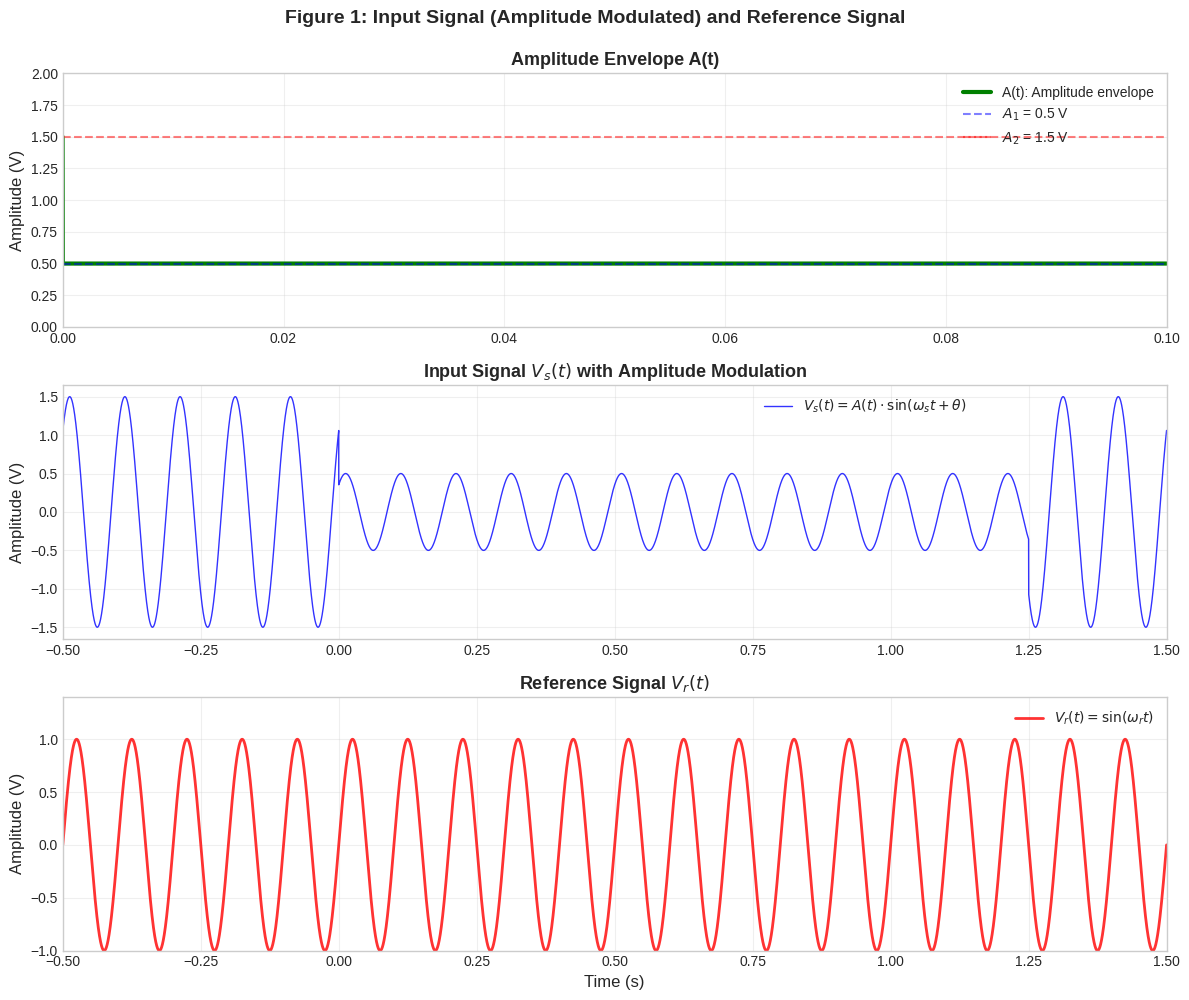

In [255]:
# Figure 1: Input and Reference signals
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# Plot 1: Amplitude envelope
axes[0].plot(t, A_t, 'g-', linewidth=3, label='A(t): Amplitude envelope')
axes[0].axhline(y=A1, color='b', linestyle='--', linewidth=1.5, alpha=0.5, label=f'$A_1$ = {A1} V')
axes[0].axhline(y=A2, color='r', linestyle='--', linewidth=1.5, alpha=0.5, label=f'$A_2$ = {A2} V')
axes[0].set_ylabel('Amplitude (V)', fontsize=12)
axes[0].set_title('Amplitude Envelope A(t)', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=10, loc='upper right')
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim([0, 0.1])
axes[0].set_ylim([0, 2])

# Plot 2: Amplitude modulated input signal
axes[1].plot(t, V_s, 'b-', linewidth=1, label='$V_s(t) = A(t) \cdot \sin(\omega_s t + \\theta)$', alpha=0.8)
# axes[1].plot(t, A_t, 'g--', linewidth=2, label='A(t): Envelope', alpha=0.7)
# axes[1].plot(t, -A_t, 'g--', linewidth=2, alpha=0.7)
axes[1].set_ylabel('Amplitude (V)', fontsize=12)
axes[1].set_title('Input Signal $V_s(t)$ with Amplitude Modulation', fontsize=13, fontweight='bold')
# axes[1].legend(fontsize=10, loc='upper right')
axes[1].legend(fontsize=10,bbox_to_anchor=(0.83, 1), loc='upper right')
axes[1].grid(True, alpha=0.3)
# No xlim set - show full time range to see modulation
axes[1].set_xlim([-0.5, 1.5])

# Plot 3: Reference signal
axes[2].plot(t, V_r, 'r-', linewidth=2, label='$V_r(t) = \sin(\omega_r t)$', alpha=0.8)
axes[2].set_xlabel('Time (s)', fontsize=12)
axes[2].set_ylabel('Amplitude (V)', fontsize=12)
axes[2].set_title('Reference Signal $V_r(t)$', fontsize=13, fontweight='bold')
axes[2].legend(fontsize=10, loc='upper right')
axes[2].grid(True, alpha=0.3)
# No xlim set - show full time range to see modulation
axes[2].set_xlim([-0.5, 1.5])
axes[2].set_ylim([-1, 1.4])

plt.suptitle('Figure 1: Input Signal (Amplitude Modulated) and Reference Signal', 
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

## Figure 2: Mixer Output (Time Domain and Frequency Domain)

Two-panel figure showing:
- **Panel 1**: Mixer output V_PSD(t) = V_s(t) × V_r(t) in time domain
  - Shows how the DC component varies with the amplitude modulation A(t)
- **Panel 2**: FFT magnitude spectrum showing DC, modulation frequency, and 2ω components

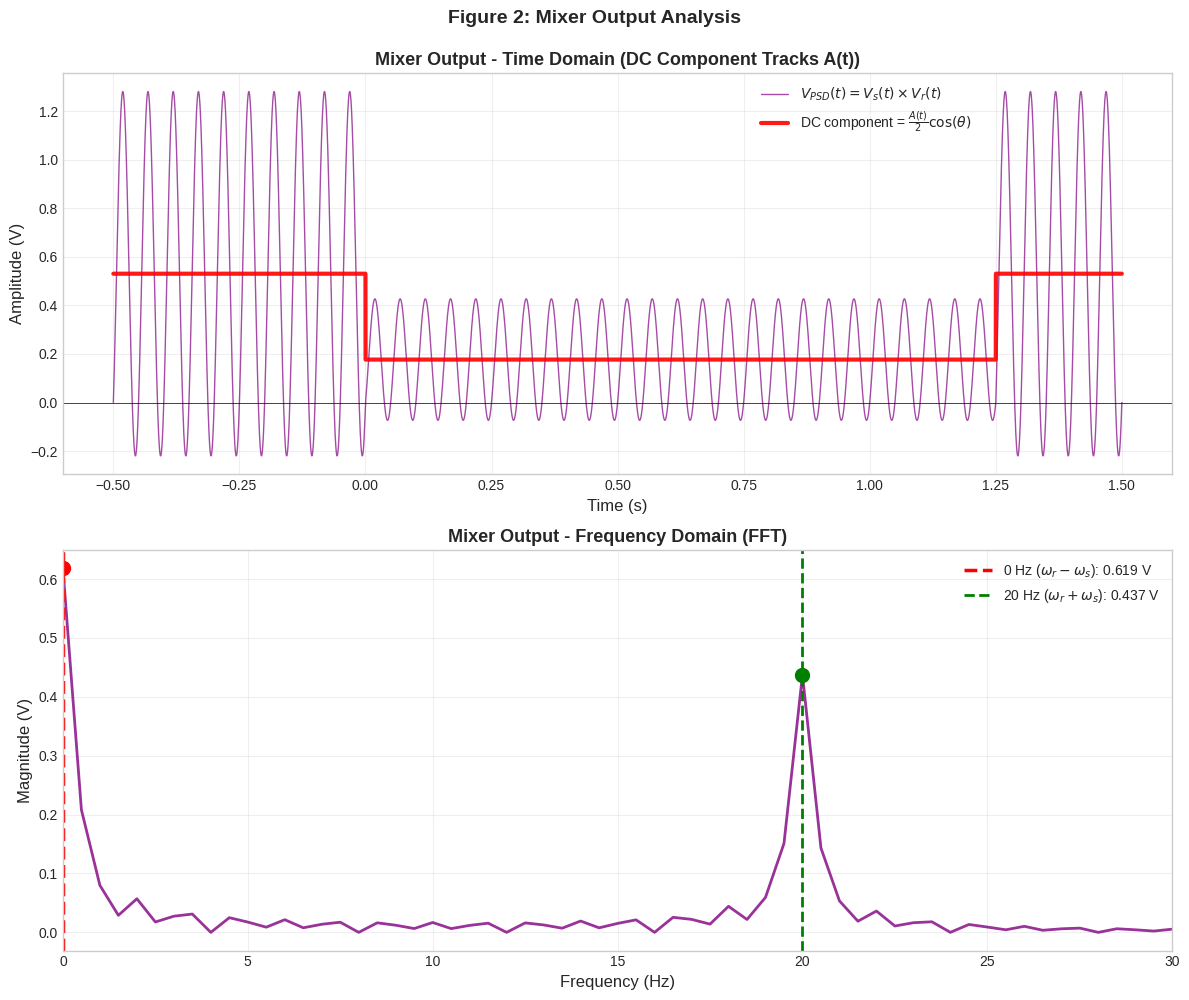

MIXER OUTPUT ANALYSIS
DC level at A₁ = 0.5:      (A₁/2)·cos(θ) = 0.1768 V
DC level at A₂ = 1.5:      (A₂/2)·cos(θ) = 0.5303 V

Frequency components in FFT:
  Modulation frequency:     0.40 Hz = 0.2081 V
  2ω component:             20 Hz = 0.4375 V
  2ω component:             100 Hz = 0.0000 V

The DC component tracks the amplitude modulation A(t)!
After low-pass filtering, this varying DC extracts A(t).


In [ ]:
# Calculate mixer output
V_PSD = V_s * V_r

# Calculate FFT
N = len(t)
dt = t[1] - t[0]
freq = np.fft.rfftfreq(N, dt)
V_PSD_fft = np.fft.rfft(V_PSD)
V_PSD_mag = np.abs(V_PSD_fft) / N * 2  # Normalize and scale for single-sided spectrum

# Figure 2: Mixer output in time and frequency domain
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Subplot 1: Time domain
axes[0].plot(t, V_PSD, 'purple', linewidth=1, alpha=0.7, label='$V_{PSD}(t) = V_s(t) \\times V_r(t)$')

# Calculate time-varying DC component (follows amplitude modulation)
DC_t = A_t / 2 * np.cos(theta)
axes[0].plot(t, DC_t, 'r-', linewidth=3, 
             label=r'DC component = $\frac{A(t)}{2}\cos(\theta)$', alpha=0.9)
# axes[0].fill_between(t, 0, DC_t, alpha=0.2, color='red', label='DC level (varies with A(t))')

# Show the two DC levels
DC1 = A1/2 * np.cos(theta)
DC2 = A2/2 * np.cos(theta)
# axes[0].axhline(y=DC1, color='blue', linestyle='--', linewidth=1.5, alpha=0.5, 
#                 label=f'DC at $A_1$: {DC1:.3f} V')
# axes[0].axhline(y=DC2, color='green', linestyle='--', linewidth=1.5, alpha=0.5, 
#                 label=f'DC at $A_2$: {DC2:.3f} V')

axes[0].set_xlabel('Time (s)', fontsize=12)
axes[0].set_ylabel('Amplitude (V)', fontsize=12)
axes[0].set_title('Mixer Output - Time Domain (DC Component Tracks A(t))', fontsize=13, fontweight='bold')
# axes[0].legend(fontsize=9, loc='upper right')
axes[0].legend(fontsize=10, bbox_to_anchor=(0.83, 1), loc='upper right')
axes[0].grid(True, alpha=0.3)
# No xlim set - show full time range to see modulation
axes[0].axhline(y=0, color='k', linewidth=0.5)

# Subplot 2: Frequency domain (FFT)
axes[1].plot(freq, V_PSD_mag, 'purple', linewidth=2, alpha=0.8)

# Mark key frequency components
# DC component at 0 Hz (ωr - ωs when ωr = ωs)
dc_idx = 0
axes[1].axvline(x=freq[dc_idx], color='red', linestyle='--', linewidth=2.5, 
                label=f'0 Hz ($\\omega_r - \\omega_s$): {V_PSD_mag[dc_idx]:.3f} V')
axes[1].plot(freq[dc_idx], V_PSD_mag[dc_idx], 'ro', markersize=10)

# Modulation frequency (switching rate)
mod_freq = 1 / (2 * switch_period)  # Modulation frequency from amplitude switching
mod_idx = np.argmin(np.abs(freq - mod_freq))
# axes[1].axvline(x=freq[mod_idx], color='orange', linestyle='--', linewidth=2, 
#                 label=f'Modulation ({mod_freq:.2f} Hz): {V_PSD_mag[mod_idx]:.3f} V')
# axes[1].plot(freq[mod_idx], V_PSD_mag[mod_idx], 'o', color='orange', markersize=10)

# Mark the 2ω peak (ωr + ωs = 2*f_s)
peak_2omega_freq = 2 * f_s
peak_2omega_idx = np.argmin(np.abs(freq - peak_2omega_freq))
axes[1].axvline(x=freq[peak_2omega_idx], color='green', linestyle='--', linewidth=2, 
                label=f'{peak_2omega_freq} Hz ($\\omega_r + \\omega_s$): {V_PSD_mag[peak_2omega_idx]:.3f} V')
axes[1].plot(freq[peak_2omega_idx], V_PSD_mag[peak_2omega_idx], 'o', color='green', markersize=10)

axes[1].set_xlabel('Frequency (Hz)', fontsize=12)
axes[1].set_ylabel('Magnitude (V)', fontsize=12)
axes[1].set_title('Mixer Output - Frequency Domain (FFT)', fontsize=13, fontweight='bold')
axes[1].legend(fontsize=10, loc='upper right')
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim([0, 30])  # Start from 0 Hz (no negative frequencies in rfft)

plt.suptitle('Figure 2: Mixer Output Analysis', fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("="*70)
print("MIXER OUTPUT ANALYSIS")
print("="*70)
print(f"DC level at A₁ = {A1}:      (A₁/2)·cos(θ) = {DC1:.4f} V")
print(f"DC level at A₂ = {A2}:      (A₂/2)·cos(θ) = {DC2:.4f} V")
print()
print("Frequency components in FFT:")
print(f"  Modulation frequency:     {mod_freq:.2f} Hz = {V_PSD_mag[mod_idx]:.4f} V")
print(f"  2ω component:             {peak_2omega_freq} Hz = {V_PSD_mag[peak_2omega_idx]:.4f} V")
print(f"  2ω component:             100 Hz = {V_PSD_mag[peak_100Hz_idx]:.4f} V")
print()
print("The DC component tracks the amplitude modulation A(t)!")
print("After low-pass filtering, this varying DC extracts A(t).")
print("="*70)

## Figure 3: Block Diagram

Simple block diagram showing the signal flow through a lock-in amplifier:
1. Input Signal V_s(t) → Mixer
2. Reference V_r(t) → Mixer
3. Mixer → Low-Pass Filter
4. Low-Pass Filter → DC Output

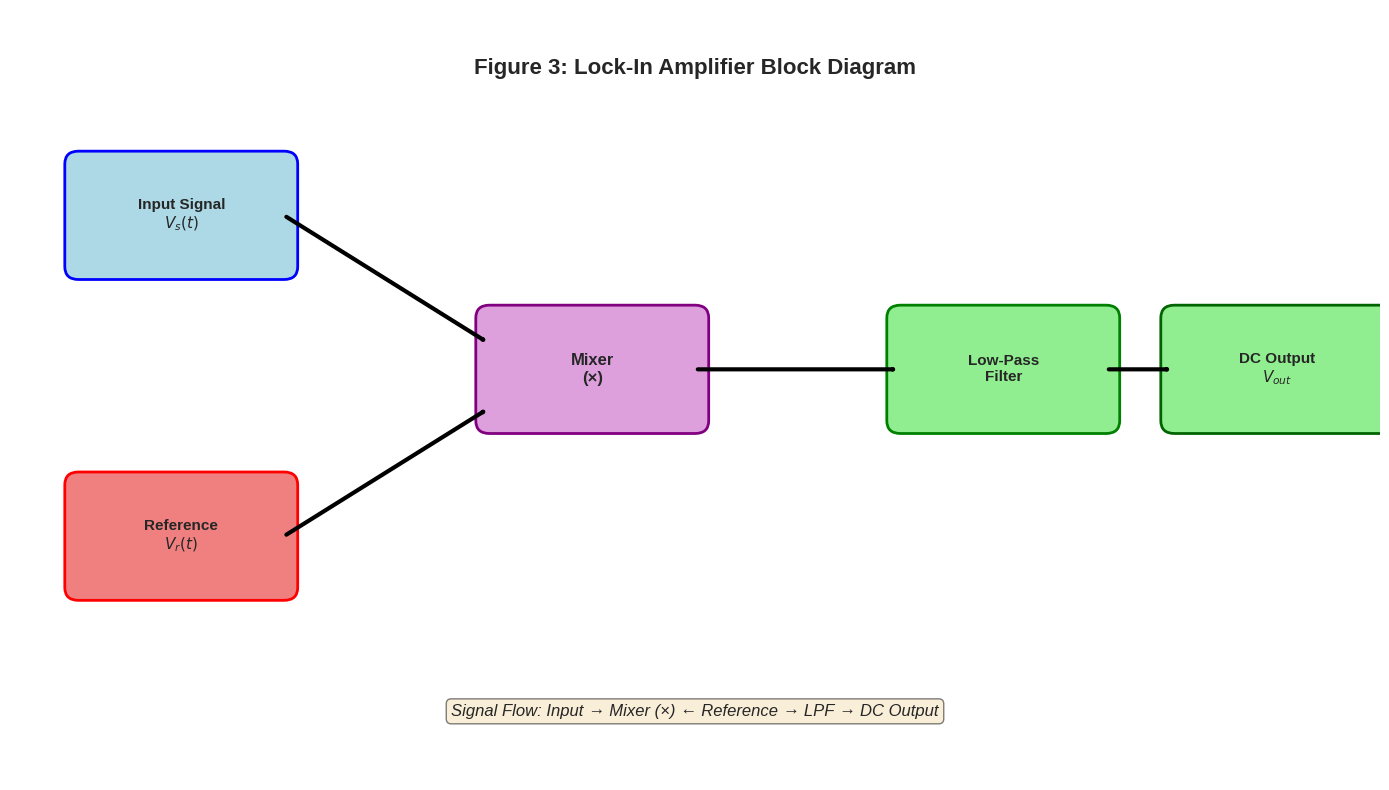

BLOCK DIAGRAM DESCRIPTION
Signal flow:
  1. Input Signal V_s(t) → Mixer
  2. Reference V_r(t) → Mixer
  3. Mixer (×) → Low-Pass Filter
  4. Low-Pass Filter → DC Output V_out

The mixer performs phase-sensitive detection by multiplying
the input by the reference, and the low-pass filter extracts
the DC component, which is proportional to A·cos(θ).


In [ ]:
# Figure 3: Block Diagram
fig, ax = plt.subplots(figsize=(14, 8))

# Turn off axis
ax.set_xlim(0, 10)
ax.set_ylim(0, 6)
ax.axis('off')

# Define box parameters
box_width = 1.5
box_height = 0.8
arrow_props = dict(arrowstyle='->', lw=3, color='black')

# Input Signal box
input_box = FancyBboxPatch((0.5, 4), box_width, box_height, 
                           boxstyle="round,pad=0.1", 
                           edgecolor='blue', facecolor='lightblue', linewidth=2)
ax.add_patch(input_box)
ax.text(0.5 + box_width/2, 4 + box_height/2, 'Input Signal\n$V_s(t)$', 
        ha='center', va='center', fontsize=11, fontweight='bold')

# Reference Signal box
ref_box = FancyBboxPatch((0.5, 1.5), box_width, box_height, 
                         boxstyle="round,pad=0.1", 
                         edgecolor='red', facecolor='lightcoral', linewidth=2)
ax.add_patch(ref_box)
ax.text(0.5 + box_width/2, 1.5 + box_height/2, 'Reference\n$V_r(t)$', 
        ha='center', va='center', fontsize=11, fontweight='bold')

# Mixer box
mixer_box = FancyBboxPatch((3.5, 2.8), box_width, box_height, 
                           boxstyle="round,pad=0.1", 
                           edgecolor='purple', facecolor='plum', linewidth=2)
ax.add_patch(mixer_box)
ax.text(3.5 + box_width/2, 2.8 + box_height/2, 'Mixer\n(×)', 
        ha='center', va='center', fontsize=12, fontweight='bold')

# Low-Pass Filter box
lpf_box = FancyBboxPatch((6.5, 2.8), box_width, box_height, 
                         boxstyle="round,pad=0.1", 
                         edgecolor='green', facecolor='lightgreen', linewidth=2)
ax.add_patch(lpf_box)
ax.text(6.5 + box_width/2, 2.8 + box_height/2, 'Low-Pass\nFilter', 
        ha='center', va='center', fontsize=11, fontweight='bold')

# Output box
output_box = FancyBboxPatch((8.5, 2.8), box_width, box_height, 
                            boxstyle="round,pad=0.1", 
                            edgecolor='darkgreen', facecolor='lightgreen', linewidth=2)
ax.add_patch(output_box)
ax.text(8.5 + box_width/2, 2.8 + box_height/2, 'Filtered Output\n$V_{out}$', 
        ha='center', va='center', fontsize=11, fontweight='bold')

# Arrows
# Input to Mixer
arrow1 = FancyArrowPatch((2.0, 4.4), (3.5, 3.4), **arrow_props)
ax.add_patch(arrow1)

# Reference to Mixer
arrow2 = FancyArrowPatch((2.0, 1.9), (3.5, 2.9), **arrow_props)
ax.add_patch(arrow2)

# Mixer to LPF
arrow3 = FancyArrowPatch((5.0, 3.2), (6.5, 3.2), **arrow_props)
ax.add_patch(arrow3)

# LPF to Output
arrow4 = FancyArrowPatch((8.0, 3.2), (8.5, 3.2), **arrow_props)
ax.add_patch(arrow4)

# Add title
ax.text(5, 5.5, 'Figure 3: Lock-In Amplifier Block Diagram', 
        ha='center', fontsize=16, fontweight='bold')

# Add explanatory text
ax.text(5, 0.5, 'Signal Flow: Input → Mixer (×) ← Reference → LPF → Filtered Output', 
        ha='center', fontsize=12, style='italic', 
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("="*70)
print("BLOCK DIAGRAM DESCRIPTION")
print("="*70)
print("Signal flow:")
print("  1. Input Signal V_s(t) → Mixer")
print("  2. Reference V_r(t) → Mixer")
print("  3. Mixer (×) → Low-Pass Filter")
print("  4. Low-Pass Filter → Filtered Output V_out")
print()
print("The mixer performs phase-sensitive detection by multiplying")
print("the input by the reference, and the low-pass filter extracts")
print("the low-frequency component, which is proportional to A·cos(θ).")
print("="*70)

## Optional: Combined Figure (3-Panel Vertical Layout)

A comprehensive 3-panel figure showing:
1. Input signal V_s(t) and reference V_r(t)
2. Mixer output V_PSD(t) in time domain
3. FFT of V_PSD(t) showing DC and 2ω peaks

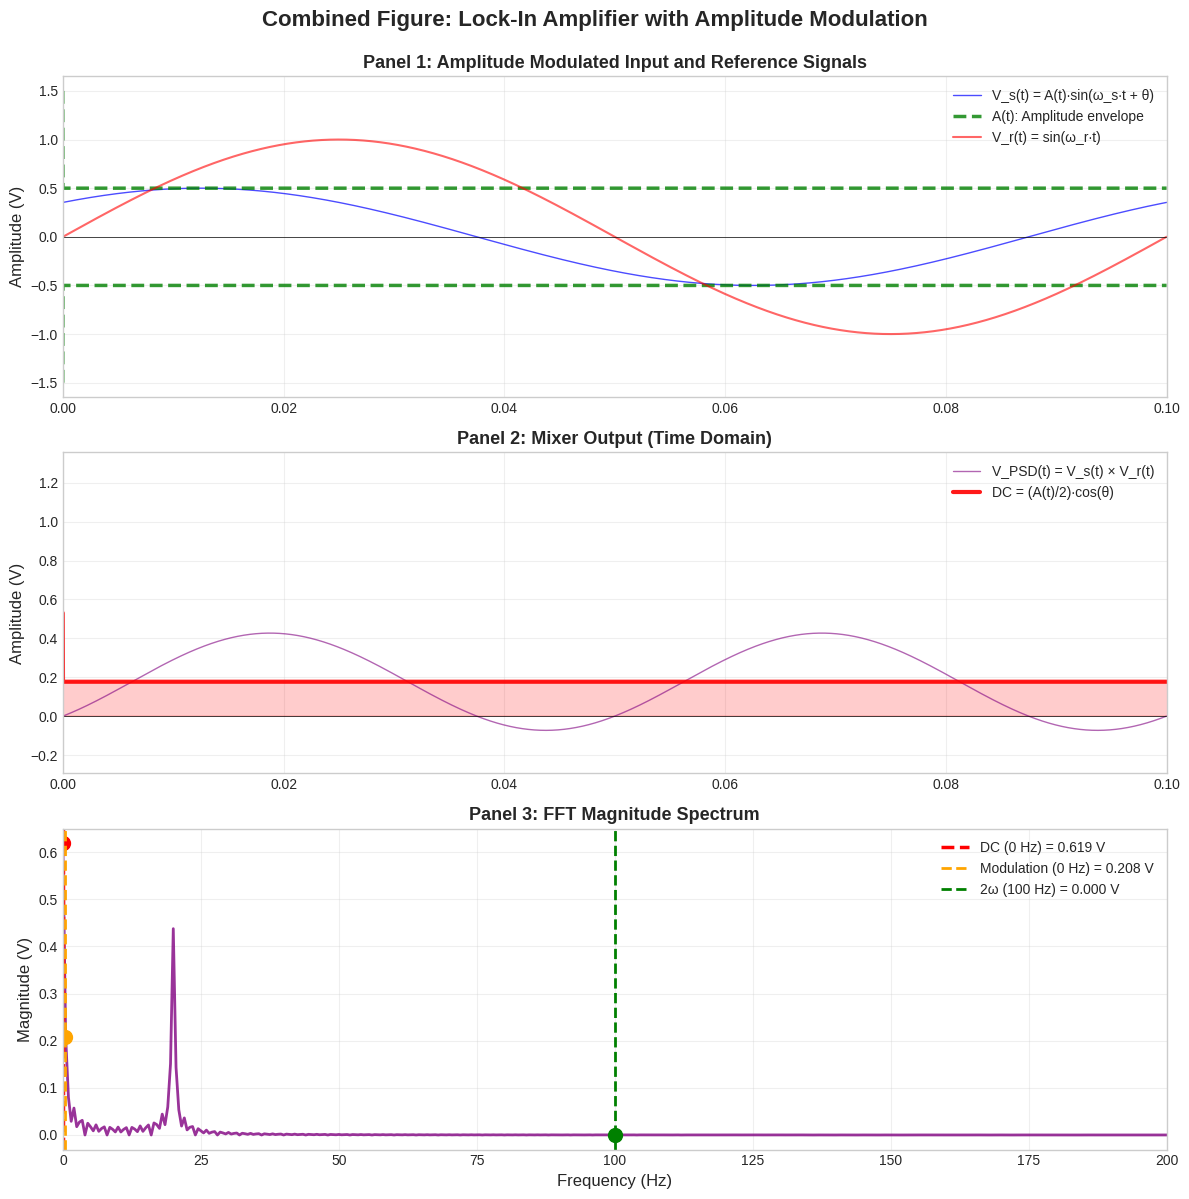

In [258]:
# Optional: Combined 3-panel figure
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# Panel 1: Amplitude modulated input and reference signals
axes[0].plot(t, V_s, 'b-', linewidth=1, label='V_s(t) = A(t)·sin(ω_s·t + θ)', alpha=0.7)
axes[0].plot(t, A_t, 'g--', linewidth=2.5, label='A(t): Amplitude envelope', alpha=0.8)
axes[0].plot(t, -A_t, 'g--', linewidth=2.5, alpha=0.8)
axes[0].plot(t, V_r, 'r-', linewidth=1.5, label='V_r(t) = sin(ω_r·t)', alpha=0.6)
axes[0].set_ylabel('Amplitude (V)', fontsize=12)
axes[0].set_title('Panel 1: Amplitude Modulated Input and Reference Signals', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=10, loc='upper right')
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim([0, 0.1])
axes[0].axhline(y=0, color='k', linewidth=0.5)

# Panel 2: Mixer output V_PSD(t) in time domain
axes[1].plot(t, V_PSD, 'purple', linewidth=1, alpha=0.6, label='V_PSD(t) = V_s(t) × V_r(t)')
axes[1].plot(t, DC_t, 'r-', linewidth=3, label='DC = (A(t)/2)·cos(θ)', alpha=0.9)
axes[1].fill_between(t, 0, DC_t, alpha=0.2, color='red')
axes[1].set_ylabel('Amplitude (V)', fontsize=12)
axes[1].set_title('Panel 2: Mixer Output (Time Domain)', fontsize=13, fontweight='bold')
axes[1].legend(fontsize=10, loc='upper right')
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim([0, 0.1])
axes[1].axhline(y=0, color='k', linewidth=0.5)

# Panel 3: FFT of V_PSD(t)
axes[2].plot(freq, V_PSD_mag, 'purple', linewidth=2, alpha=0.8)
axes[2].axvline(x=0, color='red', linestyle='--', linewidth=2.5, 
                label=f'DC (0 Hz) = {V_PSD_mag[dc_idx]:.3f} V')
axes[2].plot(0, V_PSD_mag[dc_idx], 'ro', markersize=10)
axes[2].axvline(x=mod_freq, color='orange', linestyle='--', linewidth=2, 
                label=f'Modulation ({mod_freq:.0f} Hz) = {V_PSD_mag[mod_idx]:.3f} V')
axes[2].plot(mod_freq, V_PSD_mag[mod_idx], 'o', color='orange', markersize=10)
axes[2].axvline(x=100, color='green', linestyle='--', linewidth=2, 
                label=f'2ω (100 Hz) = {V_PSD_mag[peak_100Hz_idx]:.3f} V')
axes[2].plot(100, V_PSD_mag[peak_100Hz_idx], 'o', color='green', markersize=10)
axes[2].set_xlabel('Frequency (Hz)', fontsize=12)
axes[2].set_ylabel('Magnitude (V)', fontsize=12)
axes[2].set_title('Panel 3: FFT Magnitude Spectrum', fontsize=13, fontweight='bold')
axes[2].legend(fontsize=10, loc='upper right')
axes[2].grid(True, alpha=0.3)
axes[2].set_xlim([0, 200])

plt.suptitle('Combined Figure: Lock-In Amplifier with Amplitude Modulation', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

## Summary

This notebook has generated all three requested figures with **amplitude modulation**:

**Figure 1**: Shows the amplitude modulated input signal V_s(t) where A(t) switches between 0.5 V and 1.5 V every 25 ms, alongside the reference signal V_r(t) at 50 Hz. This makes it very clear that the lock-in amplifier must extract this time-varying amplitude.

**Figure 2**: Demonstrates the mixer output in both time and frequency domains:
- Time domain shows the DC component varying with A(t): switching between ~0.177 V and ~0.530 V
- Frequency domain FFT shows the modulation frequency (20 Hz) and the 2ω component (100 Hz)
- The varying DC component is what gets extracted by the low-pass filter to recover A(t)!

**Figure 3**: Block diagram illustrating the signal flow through the lock-in amplifier from input through mixer and low-pass filter to DC output.

The amplitude modulation makes it **much more obvious** that the lock-in amplifier is extracting the envelope A(t) from the high-frequency carrier, demonstrating its power for measuring time-varying signals!